# Image Denoising Using Autoencoders  

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [2]:
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize images to range [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Reshape to add a single channel (for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [5]:
# Add noise to images
noise_factor = 0.4  # Adjust noise level
X_train_noisy = X_train + noise_factor * np.random.randn(*X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.randn(*X_test.shape)

In [6]:
# Clip values to be in [0,1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


In [7]:
# Build the Autoencoder model
autoencoder = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding="same"),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),
    
    # Upsampling (Decoding)
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation="sigmoid", padding="same")  # Output layer
])


C:\Users\swaro\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [9]:
# Train the Autoencoder
autoencoder.fit(X_train_noisy, X_train, epochs=5, batch_size=128, validation_data=(X_test_noisy, X_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - loss: 0.2587 - val_loss: 0.1018
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - loss: 0.1013 - val_loss: 0.0959
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - loss: 0.0962 - val_loss: 0.0932
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.0937 - val_loss: 0.0915
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 59ms/step - loss: 0.0921 - val_loss: 0.0906


In [10]:
# Denoise test images
X_test_denoised = autoencoder.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


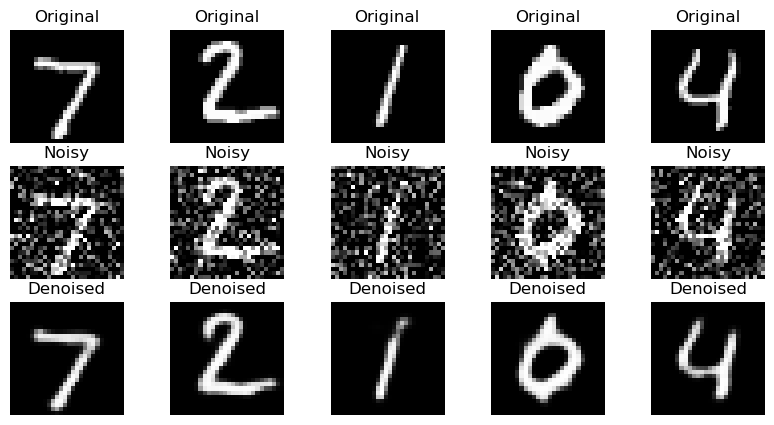

In [11]:
# Display results
n = 5  # Number of images to display
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test_denoised[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()